In [2]:
# KNN Classification
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


df=read_csv("glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
array = df.values
X = array[:, 0:9]
Y = array[:, 9]
X

array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  8.44   ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  8.48   ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  8.62   ,  1.67   ,  0.     ]])

In [4]:
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7.])

In [5]:
model = KNeighborsClassifier(n_neighbors=1)
results = cross_val_score(model, X, Y)

In [6]:
print(results.mean())

0.640531561461794


In [7]:
#Grid Search for Algorithm Tuning to find best n_neighbours
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [8]:
array = df.values
X = array[:, 0:9]
Y = array[:, 9]

In [9]:
n_neighbors = numpy.array(range(1,30))
param_grid = dict(n_neighbors=n_neighbors)

In [10]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [11]:
print(grid.best_score_)
print(grid.best_params_)

0.640531561461794
{'n_neighbors': 1}


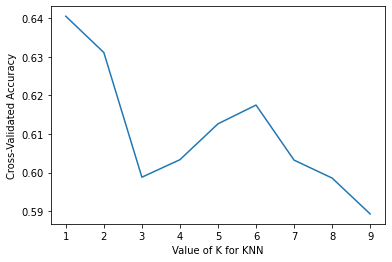

In [12]:
#Visualizing the CV results
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 10)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [13]:
k_scores

[0.640531561461794,
 0.6311184939091916,
 0.598781838316722,
 0.6033222591362126,
 0.612624584717608,
 0.6174972314507199,
 0.6032115171650055,
 0.5985603543743079,
 0.5892580287929124]

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
Zoo=pd.read_csv('Zoo.csv')
zoo=Zoo.iloc[:,1:]
zoo.head()


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [30]:
#to split train and test data
from sklearn.model_selection import train_test_split
train,test=train_test_split(zoo,test_size=0.3,random_state=0)
train

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
80,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,0,3
91,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3
68,1,0,0,1,0,0,1,1,1,1,0,0,4,1,1,1,1
51,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
27,1,0,0,1,1,0,0,1,1,1,0,0,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
67,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
64,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
47,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [31]:
test

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
26,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5
86,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1,4
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
55,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
75,1,0,0,1,0,1,1,1,1,1,0,1,2,1,0,1,1
94,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1
16,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2
73,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,4
54,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1


In [17]:
#KNN
from sklearn.neighbors import KNeighborsClassifier as KNC

In [29]:
#to find best k value
acc=[]
for i in range(3,50,2):
    neigh=KNC(n_neighbors=i)
    neigh.fit(train.iloc[:,0:16],train.iloc[:,16])
    train_acc=np.mean(neigh.predict(train.iloc[:,0:16])==train.iloc[:,16])
    test_acc=np.mean(neigh.predict(test.iloc[:,0:16])==test.iloc[:,16])
    acc.append([train_acc,test_acc])
acc

[[0.9571428571428572, 0.9354838709677419],
 [0.9714285714285714, 0.9354838709677419],
 [0.8571428571428571, 0.9032258064516129],
 [0.8142857142857143, 0.8709677419354839],
 [0.7714285714285715, 0.8387096774193549],
 [0.7714285714285715, 0.8387096774193549],
 [0.7714285714285715, 0.8387096774193549],
 [0.8, 0.8387096774193549],
 [0.7142857142857143, 0.6129032258064516],
 [0.6571428571428571, 0.6129032258064516],
 [0.6285714285714286, 0.5483870967741935],
 [0.5857142857142857, 0.5483870967741935],
 [0.5857142857142857, 0.5483870967741935],
 [0.5857142857142857, 0.5483870967741935],
 [0.5857142857142857, 0.5483870967741935],
 [0.5857142857142857, 0.5483870967741935],
 [0.5571428571428572, 0.5483870967741935],
 [0.5428571428571428, 0.5161290322580645],
 [0.5428571428571428, 0.5161290322580645],
 [0.5428571428571428, 0.5161290322580645],
 [0.45714285714285713, 0.41935483870967744],
 [0.42857142857142855, 0.3548387096774194],
 [0.42857142857142855, 0.3548387096774194],
 [0.42857142857142855,

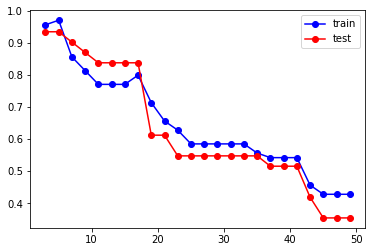

In [42]:
plt.plot(np.arange(3,50,2),[i[0] for i in acc],'bo-')
plt.plot(np.arange(3,50,2),[i[1] for i in acc],'ro-')
plt.legend(['train','test'])

In [44]:
#from plots atk=5 we get best model
#model building at k=5
neigh=KNC(n_neighbors=5)
neigh.fit(train.iloc[:,0:16],train.iloc[:,16])
train_acc=np.mean(neigh.predict(train.iloc[:,0:16])==train.iloc[:,16])
test_acc=np.mean(neigh.predict(test.iloc[:,0:16])==test.iloc[:,16])
train_acc


0.9714285714285714

In [45]:
test_acc

0.9354838709677419